In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
df = pd.read_excel('./depreciation_cost_original.xlsx', sheet='18추정')
df.columns = [col.strip() for col in df.columns]
column_dict = {
    'Serial No.': 'serial_no', 
    'Warranty기간': 'warranty_period', 
    '내용연수': 'years', 
    '담당코스트센타': 'cost_depart_id', 
    '담당코스트센터명': 'cost_depart_name', 
    '보조번호': 'sub_id', 
    '본부/부문': 'section_name', 
    '분류': 'cate_id', 
    '분류명': 'cate_name', 
    '사업영역': 'business_area', 
    '수  량': 'val', 
    '유지보수금액': 'maintenance_cost', 
    '유지보수율': 'maintenance_ratio', 
    # '자본화연도': 'intro_year', 
    # '자본화월': 'intro_month', 
    '자본화일': 'intro_date', 
    '자산내역': 'asset_name', 
    '자산번호': 'id', 
    '자산상세내역': 'asset_details', 
    '자산클래스': 'asset_class_id', 
    '자산클래스명': 'asset_class_name', 
    '전기말감가상각누계액': 'prev_depre_cost', 
    '총취득원가': 'original_price', 
    '코스트센터': 'depart_id', 
    '코스트센터명': 'depart_name'
}
df = df.rename(column_dict, axis=1)
df = df.loc[:, column_dict.values()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 23 columns):
serial_no            5 non-null object
warranty_period      0 non-null float64
years                4034 non-null int64
cost_depart_id       4034 non-null int64
cost_depart_name     4034 non-null object
sub_id               4034 non-null int64
section_name         0 non-null float64
cate_id              4032 non-null object
cate_name            4032 non-null object
business_area        4034 non-null object
val                  4034 non-null int64
maintenance_cost     0 non-null float64
maintenance_ratio    0 non-null float64
intro_date           4034 non-null object
asset_name           4034 non-null object
id                   4034 non-null int64
asset_details        858 non-null object
asset_class_id       4034 non-null int64
asset_class_name     4034 non-null object
prev_depre_cost      0 non-null float64
original_price       4034 non-null int64
depart_id            4034 non-nu

/home/admin-/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [4]:
df.columns

Index(['serial_no', 'warranty_period', 'years', 'cost_depart_id',
       'cost_depart_name', 'sub_id', 'section_name', 'cate_id', 'cate_name',
       'business_area', 'val', 'maintenance_cost', 'maintenance_ratio',
       'intro_date', 'asset_name', 'id', 'asset_details', 'asset_class_id',
       'asset_class_name', 'prev_depre_cost', 'original_price', 'depart_id',
       'depart_name'],
      dtype='object')

In [5]:
df_depre = df.loc[:, ['asset_name', 'asset_class_name', 'original_price', 'depart_name', 'cate_name', 'intro_date']]

In [6]:
df_depre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 6 columns):
asset_name          4034 non-null object
asset_class_name    4034 non-null object
original_price      4034 non-null int64
depart_name         4034 non-null object
cate_name           4032 non-null object
intro_date          4034 non-null object
dtypes: int64(1), object(5)
memory usage: 189.2+ KB


In [7]:
df_depre.head()

,asset_name,asset_class_name,original_price,depart_name,cate_name,intro_date
0,N-LG-U460-14-i5,전산장비,930150,IT개발운영팀,전산장비-노트북PC,2014.01.01
1,L-LG-23MP55HQ,전산장비,176931,디지털콘텐츠사업본부,전산장비-모니터,2014.01.01
2,N-LG-U460-14-i5,전산장비,930150,IT개발운영팀,전산장비-노트북PC,2014.01.01
3,D-LG-Z70PS-i5,전산장비,808826,IT개발운영팀,전산장비-데스크탑PC,2014.01.01
4,L-LG-23MP55HQ,전산장비,176931,웰빙라이프팀,전산장비-모니터,2014.01.01


In [8]:
df_depre.asset_class_name = df_depre['asset_class_name'].astype('category')
df_depre.depart_name = df_depre['depart_name'].astype('category')
df_depre.cate_name = df_depre['cate_name'].astype('category')
df_depre['intro_year'] = df_depre['intro_date'].apply(lambda x: x[:4]).astype('category')
df_depre['original_price'] = df_depre['original_price'].apply(lambda x: int(x))

In [9]:
df_depre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 7 columns):
asset_name          4034 non-null object
asset_class_name    4034 non-null category
original_price      4034 non-null int64
depart_name         4034 non-null category
cate_name           4032 non-null category
intro_date          4034 non-null object
intro_year          4034 non-null category
dtypes: category(4), int64(1), object(2)
memory usage: 117.2+ KB


In [10]:
df_depre_year = df_depre.groupby(by=[df_depre.intro_year])[['original_price']].sum()

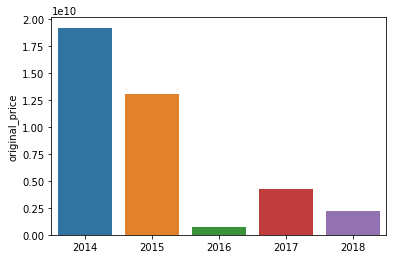

In [11]:
sns.barplot(x=df_depre_year.index.tolist(), y=df_depre_year.original_price)

In [16]:
df_depre_depart_name = df_depre.groupby(by=[df_depre.depart_name])[['original_price']].sum()
df_depre_depart_name

,original_price
depart_name,
AI/블록체인/R&D센터,61450084
AI팀,29277046
ASTRO GSSHOP(말레이시아),2047986
CEO실,23287281
CI사업부,4767205
CX팀,169716217
CoE,6777750
DM팀,23014071
HR부문,928231


In [17]:
df_depre_depart_name = df_depre_depart_name.sort_values(ascending=False, by=['original_price'])
df_depre_depart_name

,original_price
depart_name,
IT개발운영팀,10901167012
Micro SVC팀,9232131783
데이터팀,3744304359
e사업부,3204147295
M마케팅팀,2538833759
My Shop 영업팀,2312717573
보안센터,1582401659
IT인프라운영팀,785996897
금융팀,762407910


In [13]:
for depart in df_depre_depart_name.index.tolist():
    if 'ai' in depart or 'AI' in depart:
        print(depart)

AI/블록체인/R&D센터
AI팀
Huimai(중국)


In [18]:
df_depre_depart_name = df_depre_depart_name.head(20)
df_depre_depart_name

,original_price
depart_name,
IT개발운영팀,10901167012
Micro SVC팀,9232131783
데이터팀,3744304359
e사업부,3204147295
M마케팅팀,2538833759
My Shop 영업팀,2312717573
보안센터,1582401659
IT인프라운영팀,785996897
금융팀,762407910


In [ ]:
sns.barplot(x=df_depre_depart_name.index.tolist(), y=df_depre_depart_name.index.tolist())